In [124]:
import pandas as pd
import numpy as np
nba = pd.read_csv("nba_players.csv")
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy,SF,23,TOT,63,0,13.4,1.0,2.2,...,.660,1.1,2.3,3.4,0.4,0.4,0.4,0.5,1.9,2.7
1,1,Quincy Acy,SF,23,TOR,7,0,8.7,0.9,2.0,...,.625,0.7,1.4,2.1,0.6,0.6,0.4,0.3,1.1,2.7
2,1,Quincy Acy,SF,23,SAC,56,0,14.0,1.1,2.3,...,.667,1.2,2.4,3.6,0.4,0.3,0.4,0.5,2.0,2.7
3,2,Steven Adams,C,20,OKC,81,20,14.8,1.1,2.3,...,.581,1.8,2.3,4.1,0.5,0.5,0.7,0.9,2.5,3.3
4,3,Jeff Adrien,PF,27,TOT,53,12,18.1,2.7,5.2,...,.639,1.9,3.8,5.8,0.7,0.5,0.7,0.7,2.0,6.8


Now we have a grasp of what our data look like. Next let's extract out information of point guards from the data set. Point guards are specified as PG in the position(POS) column. 

We also want points per game and assist turnover ration for each player. While our dataset doesn't come with Assist Turnover Ratio, we can easily calculate those using each player's assists per game(AST) and the turnovers per game(TOV) if we divide the AST column and TOV column. Let's create a new column called atr which represents Assist Turnover Ratio to store the ratios.

A notice here is that we need to drop the players who have 0 turnovers. Not only did these players only play a few games, making it hard to understand their true abilities, but we also cannot divide by 0 when we calculate atr. Another thing to pay attention to is AST and TOV columns are string type, we may want to convert to numeric type first.  

In [125]:
point_guards = nba[nba['Pos'] == 'PG']

point_guards.AST = point_guards.AST.astype(float)
point_guards.TOV = point_guards.TOV.astype(float)
point_guards.PTS = point_guards.PTS.astype(float)

point_guards = point_guards[point_guards['TOV'] != 0]
point_guards['atr'] = point_guards['AST'] / point_guards['TOV']

point_guards[['PTS','atr']].head()

/Users/Suyang/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,PTS,atr
35,13.1,2.444444
36,2.1,1.111111
37,14.9,2.631579
42,7.5,1.600000
43,8.4,2.375000


In the next step, we are going to visualize the point guards. We will use matplotlib to create a scatter plot with Points Per Game (PTS) on the X axis and Assist Turnover Ratio (atr) on the Y axis.

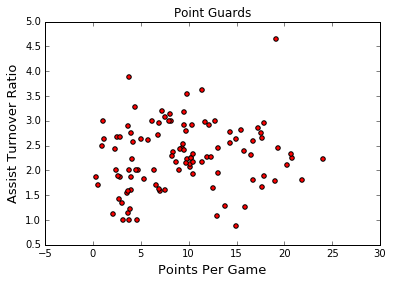

In [126]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.scatter(point_guards['PTS'], point_guards['atr'], c='r')
plt.title('Point Guards')
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

It may be hard to tell how many regions or clusters that the point guards fall into at first glance(with a few outliers of course!). We can use a technique called clustering to segment all of the point guards into groups of alike players. We know that supervised machine learning techniques work well when we have a clear metric we want to optimize for and lots of pre-labelled data, here, we need to instead use unsupervised machine learning techniques to explore the structure within a data set that doesn't have a clear value to optimize.

K-Means Clustering is a popular centroid-based clustering algorithm that we will use. The centroid represent the arithmetic mean of all of the data points in that cluster. The K in K-Means refers to the number of clusters we want to segment our data into. We can pick the k that makes the most sense for our use case. We'll set k to 5 since we want K-Means to segment our data into 5 clusters.

In [127]:
# Create the centroids
num_clusters = 5
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
centroids = point_guards.ix[random_initial_points]
# Use numpy's random function to generate a list of indices, length: num_clusters
# Use the random indices to create the centroids(A new dataframe)

print(random_initial_points)
print(centroids)

[ 35 508 284 457  52]
      Rk          Player Pos Age   Tm   G  GS    MP   FG   FGA    ...     ORB  \
35    25   D.J. Augustin  PG  26  TOT  71   9  27.3  4.2  10.1    ...     0.2   
508  389  Ramon Sessions  PG  27  TOT  83  19  26.7  4.0   9.3    ...     0.5   
284  205     George Hill  PG  27  IND  76  76  32.0  3.6   8.1    ...     0.7   
457  346     Tony Parker  PG  31  SAS  68  68  29.4  6.7  13.4    ...     0.3   
52    39  Jerryd Bayless  PG  25  MEM  31   5  21.0  2.9   7.7    ...     0.3   

     DRB  TRB  AST  STL  BLK  TOV   PF   PTS       atr  
35   1.6  1.8  4.4  0.7  0.0  1.8  2.1  13.1  2.444444  
508  2.0  2.4  4.1  0.6  0.1  1.8  1.1  12.3  2.277778  
284  3.0  3.7  3.5  1.0  0.3  1.2  2.1  10.3  2.916667  
457  2.0  2.3  5.7  0.5  0.1  2.2  1.3  16.7  2.590909  
52   1.6  1.9  2.1  0.6  0.2  0.7  2.3   8.1  3.000000  

[5 rows x 31 columns]


Visualize Centroids
Let's plot the centroids, in addition to the point_guards, so we can see where the randomly chosen centroids started out.

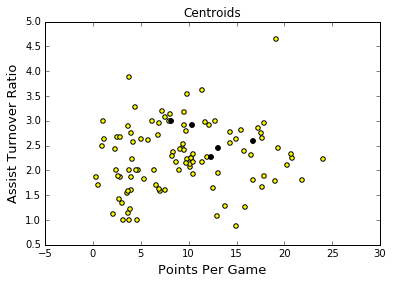

In [128]:
%matplotlib inline

plt.scatter(point_guards['PTS'], point_guards['atr'], c='yellow')
plt.scatter(centroids['PTS'], centroids['atr'], c='black')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

Setup K-Means is an iterative algorithm that switches between recalculating the centroid of each cluster and the players that belong to that cluster.

Step 1 (Assign Points to Clusters) For each player, calculate the Euclidean distance between that player's coordinates, or values for atr & pts, and each of the centroids' coordinates. Assign the player to the cluster whose centroid is the closest to, or has the lowest Euclidean distance to, the player's values.

Step 2 (Update New Centroids of the Clusters) For each cluster, compute the new centroid by calculating the arithmetic mean of all of the points (players) in that cluster. We calculate the arithmetic mean by taking the average of all of the X values (atr) and the average of all of the Y values (pts) of the points in that cluster.

Iterate Repeat steps 1 & 2 until the clusters are no longer moving and have converged.

Before we can assign players to clusters, we need a way to compare the pts and atr values of the players with each cluster's centroids. Let's create the function calculate_distance, which takes in 2 lists (the player's values for pts and atr and the centroid's values for pts and atr).

In [129]:
# Step 1 - Assign points to cluster
# Step 1.1 - Create a function which can calculate distance of two points
import math

def calculate_distance(centroids, player_values):
    square_distance = 0
    for x in range(len(centroids)):
        square_distance += (centroids[x] - player_values[x]) ** 2
    return math.sqrt(square_distance)

Since we know how to calculate the distance between each player and the centroids, now we need a way to assign data points to clusters based on Euclidean distance. 

Let's create a function that can be applied to every row in the data set (using the apply function in pandas). For each player, we want to calculate the distances to each cluster's centroid using euclidean_distance. Once we know the distances, we can determine which centroid is the closest (has the lowest distance) and return that centroid's cluster_id.

And then we'll create a new column, cluster_id, that contains the row-wise results of assign_to_cluster.

In [130]:
# Let's first represent the centroids with a dictionary. Therefore, we can use key as unique identifier, 
# to refer to each cluster's centroid.
def centroids_to_dict(centroids):
    dictionary = dict()
    counter = 0
    
    for index, row in centroids.iterrows():
        coordinates = [row['PTS'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1
    return dictionary

centroids_dict = centroids_to_dict(centroids)

print(centroids_dict)

{0: [13.1, 2.4444444444444446], 1: [12.3, 2.2777777777777777], 2: [10.3, 2.916666666666667], 3: [16.7, 2.590909090909091], 4: [8.1, 3.0000000000000004]}


In [131]:
# Let's assign data points to clusters based on Euclidean distance
def assign_to_cluster(row):
    closest_cluster = -1
    closest_distance = -1
    df_row = [row['PTS'], row['atr']]
    
    for cluster_id, centroid in centroids_dict.items():
        distance = calculate_distance(centroid, df_row)
        if closest_distance == -1:
            closest_distance = distance
            closest_cluster = cluster_id
        elif distance < closest_distance:
            closest_distance = distance
            closest_cluster = cluster_id
    return closest_cluster

point_guards['cluster_id'] = point_guards.apply(assign_to_cluster, axis=1)
# print(point_guards['cluster_id'])

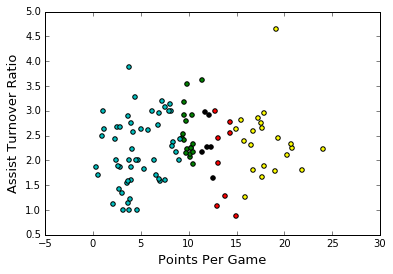

In [132]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['red', 'black', 'green', 'yellow', 'c', 'm', 'k']

    for n in range(num_clusters): # n = 0,1,2,3,4
        clustered_df = df[df['cluster_id'] == n]
        plt.scatter(clustered_df['PTS'], clustered_df['atr'], c=colors[n])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)

visualize_clusters(point_guards, 5)

Next Step: recalculate the centroids for each cluster
Finish the function, recalculate_centroids, that takes in point_guards, uses each cluster_id
(from 0 to num_clusters - 1) to pull out all of the players in each cluster, calculates the 
new arithmetic mean, and adds the cluster_id and the new arithmetic mean to new_centroids_dict, the final dictionary to be returned.

In [134]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    for n in range(num_clusters):
        cluster_df = df[df['cluster_id'] == n]
        new_centroid_coordinate = [np.mean(cluster_df['PTS']), np.mean(cluster_df['atr'])]
        new_centroids_dict[n] = new_centroid_coordinate
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)
print(centroids_dict)
# print(point_guards['cluster_id'])

{0: [13.662499999999998, 1.9932022922194295], 1: [11.983333333333333, 2.3735802612656833], 2: [9.988888888888889, 2.549204080207206], 3: [18.238095238095237, 2.390764043501321], 4: [4.735849056603773, 2.1812538710875353]}
